## Importing the .vot tables to examine their properties, and to examine the possibility of removing "over-counting"

In [1]:
import numpy as np
from scipy import stats
from scipy import optimize
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
t = Table.read(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT Catalogs\G288.5-0.5IFx_Mosaic_Mom0_comp.vot')
print(t.colnames)
print(t)

['island', 'source', 'background', 'local_rms', 'lon_str', 'lat_str', 'lon', 'err_lon', 'lat', 'err_lat', 'peak_flux', 'err_peak_flux', 'int_flux', 'err_int_flux', 'a', 'err_a', 'b', 'err_b', 'pa', 'err_pa', 'flags', 'residual_mean', 'residual_std', 'uuid', 'psf_a', 'psf_b', 'psf_pa']
island source   background     local_rms   ...  psf_a   psf_b  psf_pa
------ ------ -------------- ------------- ... ------- ------- ------
     1      0 -0.00038238958  9.391315e-05 ... 7.99992 7.99992    8.0
     2      0 -3.4013727e-05 8.2682396e-05 ... 7.99992 7.99992    8.0
     3      0  0.00012984972 0.00011368903 ... 7.99992 7.99992    8.0
     3      1  3.5077854e-05  9.156917e-05 ... 7.99992 7.99992    8.0
     5      0  9.1852875e-05 0.00013887978 ... 7.99992 7.99992    8.0
     6      0  0.00017014833 0.00012365321 ... 7.99992 7.99992    8.0
     7      0  -0.0009232825 0.00010227811 ... 7.99992 7.99992    8.0
     8      0  0.00017107005 0.00011957841 ... 7.99992 7.99992    8.0
     9      0 

In [3]:
# source area calculation (NOT ISLAND AREA)
t['area'] = np.pi * t['a'] * t['b']
#error propagation calc attempt
err_area = np.sqrt((t['area']**2)*((t['err_a']/t['a'])**2)*((t['err_b']/t['b'])**2))  
print(t)

island source   background     local_rms   ...  psf_b  psf_pa        area       
------ ------ -------------- ------------- ... ------- ------ ------------------
     1      0 -0.00038238958  9.391315e-05 ... 7.99992    8.0  333.6447235348482
     2      0 -3.4013727e-05 8.2682396e-05 ... 7.99992    8.0  647.8929954760027
     3      0  0.00012984972 0.00011368903 ... 7.99992    8.0  4385.978345967382
     3      1  3.5077854e-05  9.156917e-05 ... 7.99992    8.0  261.7033229875795
     5      0  9.1852875e-05 0.00013887978 ... 7.99992    8.0 346.93816017338395
     6      0  0.00017014833 0.00012365321 ... 7.99992    8.0  657.4431822791287
     7      0  -0.0009232825 0.00010227811 ... 7.99992    8.0  238.1358363466246
     8      0  0.00017107005 0.00011957841 ... 7.99992    8.0 324.83330838198594
     9      0 -3.5001558e-05  7.432467e-05 ... 7.99992    8.0  225.4237523829063
    10      0  -0.0006618347  0.0001219761 ... 7.99992    8.0 323.23608247094495
   ...    ...            ...

In [4]:
# print(t['psf_a'])
# print(np.min(t['psf_a']/t['psf_b']))

#all have psf_a and psf_b equal

All rows have equal psf_a and psf_b

C:\Users\clent\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


18122.938161375354 128.6604480158167


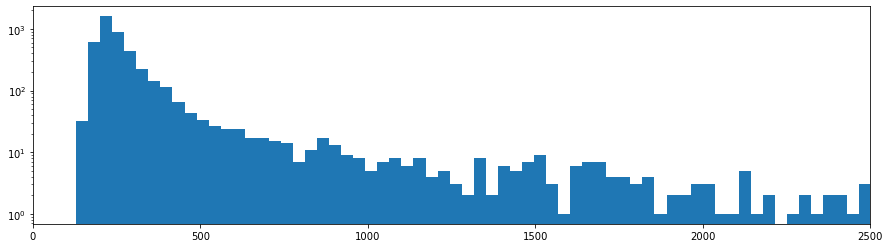

In [5]:
plt.figure(figsize=(15,4))
plt.hist(t['area'], bins=500)
plt.xlim(0,2500)
plt.yscale('log', nonposy='clip')
print(np.max(t['area']), np.min(t['area']))
#define limit in area for point sources ~400ish?

This histogram of the areas of the sources (individual sources, not areas) may prompt a limit in source area to remove less interesting objects (at around $A=400$)

1.5627017604239928


(array([  7.,  19.,  22.,  22.,  22.,  19.,  25.,  29.,  20.,  15.,  18.,
         16.,  14.,  21.,  21.,  13.,  17.,  18.,  18.,  13.,  21.,  17.,
         20.,  14.,  16.,  22.,  19.,  22.,  29.,  26.,  30.,  35.,  42.,
         41.,  35.,  47.,  44.,  41.,  46.,  51.,  64.,  66.,  69.,  70.,
         79.,  88., 110.,  90., 121., 114., 129., 135., 114., 138., 147.,
        132., 135., 151., 168., 170., 205., 202., 172., 144., 104.,  84.,
         64.,  78.,  58.,  40.,  41.,  34.,  29.,  19.,  21.,  16.,  11.,
          4.,   6.,   3.,   5.,   6.,   3.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          3.]),
 array([0.01109411, 0.02661019, 0.04212627, 0.05764234, 0.07315842,
        0.08867449, 0.10419057, 0.11970665, 0.13522272, 0.1507388 ,
        0.16625488, 0.18177095, 0.19728703, 0.21280311, 0.22831918,
        0.24383526, 0.25935134, 0.27486741, 0.29038349, 0.30589957,
        0.32141564, 0.33693172, 0.35244779, 0.

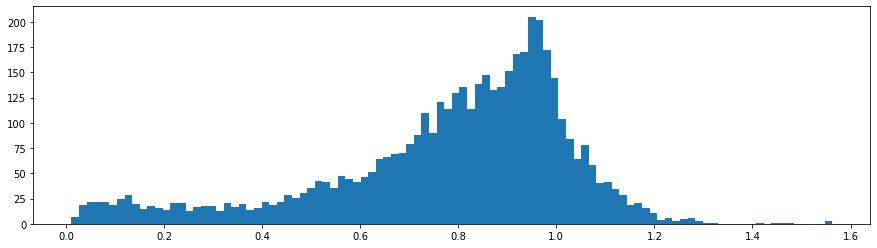

In [8]:
t['psf_area'] = np.pi * t['psf_a'] * t['psf_b']
point_sourcey = t['psf_area']/t['area']
print(np.max(point_sourcey))

plt.figure(figsize=(15,4))
plt.hist(point_sourcey, bins=100)

In [10]:
#cut-off for area - trying to remove point sources
area_mask = t['area'] > 250
t_big_area = t[area_mask]
print(len(t_big_area))

2004


In [11]:
t_big_area.write(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT Catalogs\G288.5-0.5_BY_AREA.vot', overwrite=True, format='votable')

This gives a source table with all of the sources with $A<250$pix removed. A more rigorous method may be required, since there are still over 2000 sources remaining, reduced from the inital 4635.

## Finding the island with the most sources

In [13]:
print(stats.mode(t['island']))
largest = t[t['island'] == stats.mode(t['island'])[0]]
print(largest)
print(largest['lon','lat'])
largest.write(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT Catalogs\G288.5-0.5_largest.vot', overwrite=True, format='votable')

ModeResult(mode=array([1041], dtype=int64), count=array([9]))
island source   background   ... psf_pa        area             psf_area     
------ ------ -------------- ... ------ ------------------ ------------------
  1041      0   -0.000610985 ...    8.0  309.5684228333544 201.05790861125638
  1041      1  -0.0003039742 ...    8.0    737.69349236462 201.05790861125638
  1041      2   -0.000518332 ...    8.0 1438.6024440131996 201.05790861125638
  1041      3 -0.00021567785 ...    8.0  1685.257044330107 201.05790861125638
  1041      4 -0.00034981512 ...    8.0 3927.1416356939753 201.05790861125638
  1041      5 -0.00018291848 ...    8.0 3655.5757208773143 201.05790861125638
  1041      6  -0.0001833752 ...    8.0 480.96339716729614 201.05790861125638
  1041      7 -0.00027163676 ...    8.0   875.115138434995 201.05790861125638
  1041      8 -0.00044347747 ...    8.0  5037.812386432799 201.05790861125638
       lon                 lat        
------------------ -------------------
 2

In [14]:
print(largest['a','b'])

        a                  b         
------------------ ------------------
11.866184729224946   8.30415939804915
15.817746354351094 14.845043429876032
26.405635760117526  17.34180477143439
35.984143881625705 14.907509811427326
 64.11355622559577 19.497405551594152
55.319970265173325 21.034101899748023
19.021383856138325  8.048594432916953
19.034107111351705 14.634665996327563
 40.38626799273902 39.706206268651044


## To find all of the 'interesting' sources, first remove every island that only has 1 source, then 'flatten' the remaining so they are only represented by a single point in the vo table